In [1]:
%matplotlib inline

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = np.loadtxt('parkinsons.data.txt', dtype='<U7', skiprows=1, usecols=0)

In [6]:
t= [119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654]
print(len(t))

23


In [7]:
qt_col=23
filename = 'parkinsons.data.txt'

data = np.loadtxt(filename, delimiter = ",", skiprows=1, usecols=np.arange(1, qt_col+1))
names = np.loadtxt(filename, dtype='<U7',skiprows=1,usecols=0)
#print(data)
print(data.shape)

(195, 23)


In [8]:
print(data.shape)

(195, 23)


In [9]:
status=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)',
        'MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(d)',
        'Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA',
        'NHR','HNR','status','RPDE','DFA','spread1','spread2','D2','PPE']

In [11]:
#df = pd.read_csv(filename)

In [28]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


<b>Q1.</b> Utilize suas habilidades em Python para obter a quantidade de gravacoes de indivıduos com e sem doenca de Parkinson.

In [6]:
#print(data[:,-7]==1)

In [12]:
comP = 0 
semP = 0

for j in range(data.shape[0]):
    #print('entrei')
    i = data[j,-7]
    if i == 1:
        comP += 1
    if i == 0:
        semP += 1
N = int(comP)+int(semP)
print('Indivíduos com Parkson: {:}'.format(comP))
print('Indivíduos sem Parkson: {:}'.format(semP))
print('Total de Indivíduos   : {:}'.format(N))

Indivíduos com Parkson: 147
Indivíduos sem Parkson: 48
Total de Indivíduos   : 195


<b>Q2.</b> Avalie o desempenho do kNN para 5 valores diferentes de k. Para cada valor de k, obtenha a media da taxa de acerto para 10 execucoes. Cada execucao dever ́a ser realizada com os dados aleatorizados (utilize numpy.random.shuffle()). Utilize 80% dos dados para treino e 20% para teste. Mostre os resultados num grafico, onde o eixo x  ́e o valor de k, e o y  ́e a taxa de acerto. 

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
print(N)
print(data.shape)
NTreino = int(N*.8)
NTeste = int(N*.2)
print(NTreino+NTeste)

195
(195, 23)
195


In [15]:
data_treino =  data[:NTreino,:]
data_teste =  data[NTreino:,:]
print(data_treino.shape, data_teste.shape)

label_treino = data[:NTreino,-7]
label_teste = data[NTreino:,-7]

data_treino = np.delete(data_treino, -7, axis=1)
data_teste = np.delete(data_teste, -7, axis=1)
print(data_treino.shape, data_teste.shape)

print(label_treino.shape,data_treino.shape)

(156, 23) (39, 23)
(156, 22) (39, 22)
(156,) (156, 22)


In [16]:
print(sum(label_treino),sum(label_teste),sum(label_treino)+sum(label_teste))

132.0 15.0 147.0


In [17]:
for n in range(1, 5):
    nn = KNeighborsClassifier(n_neighbors=n)
    nn.fit(data_treino, label_treino)
    previsoes = nn.predict(data_teste)
    acertos = 0
    for i in range(len(previsoes)):
        if previsoes[i] == label_teste[i]:
            acertos += 1
    #print("Para n = %d: \n Taxa de acerto total: %f" %(n, acertos/len(label_teste)))
    print("Para n = %d: Taxa de acerto total: %f" %(n, acertos/len(label_teste)))

Para n = 1: Taxa de acerto total: 0.487179
Para n = 2: Taxa de acerto total: 0.487179
Para n = 3: Taxa de acerto total: 0.487179
Para n = 4: Taxa de acerto total: 0.487179


In [18]:
def KNN (k,data_treino,label_treino, data_teste,label_teste,taxa):

    for n in range(1, k):
        nn = KNeighborsClassifier(n_neighbors=n)
        nn.fit(data_treino, label_treino)
        previsoes = nn.predict(data_teste)
        acertos = 0
        for i in range(len(previsoes)):
            if previsoes[i] == label_teste[i]:
                acertos += 1
        taxa[n-1].append(acertos/len(label_teste))
        #print("Para n = %d: \n Taxa de acerto total: %f" %(n, acertos/len(label_teste)))
        #print("Para n = %d: Taxa de acerto total: %f" %(n, acertos/len(label_teste)))
        #return(n,acertos/len(label_teste))
    return (taxa)

def limpar (data):
    data_treino =  data[:NTreino,:]
    data_teste =  data[NTreino:,:]
    label_treino = data[:NTreino,-7]
    label_teste = data[NTreino:,-7]
    data_treino = np.delete(data_treino, -7, axis=1)
    data_teste = np.delete(data_teste, -7, axis=1)
    
    return(data_treino,data_teste,label_treino,label_teste)

def limparNN (data):
    scaler = MinMaxScaler()
    data=scaler.transform(data)
    data_treino =  data[:NTreino,:]
    data_teste =  data[NTreino:,:]
    label_treino = data[:NTreino,-7]
    label_teste = data[NTreino:,-7]
    data_treino = np.delete(data_treino, -7, axis=1)
    data_teste = np.delete(data_teste, -7, axis=1)
    
    return(data_treino,data_teste,label_treino,label_teste)



In [19]:
taxa=[[],[],[],[]]
k = 5

All = KNN(k, data_treino,label_treino, data_teste,label_teste,taxa)

print(All)


[[0.48717948717948717], [0.48717948717948717], [0.48717948717948717], [0.48717948717948717]]


Text(0, 0.5, 'Taxa média de acerto')

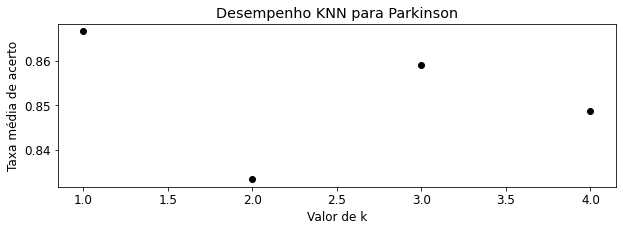

In [20]:
plt.rcParams["figure.figsize"] = [10,3]
plt.rcParams.update({'font.size': 12})

taxa=[[],[],[],[]]
k = 5

for i in range(10):
    np.random.shuffle(data)
    [data_treino,data_teste,label_treino,label_teste]=limpar(data)
    All = KNN(k, data_treino,label_treino, data_teste,label_teste,taxa)
    

for n in range(k-1):
    #print(n)
    #print('Para n = {:} Taxa média de acerto total: {:.4}'.format(n+1,np.mean(All[n])))
    plt.plot(n+1,np.mean(All[n]),'ko')
plt.title('Desempenho KNN para Parkinson')
plt.xlabel('Valor de k')
plt.ylabel('Taxa média de acerto')


3. Repita o item acima, mas agora com os dados normalizados com o metodo minmax. Compare os resultados.

In [30]:
def limparNN (data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    data=scaler.transform(data)
    #print(np.max(data))
    data_treino =  data[:NTreino,:]
    data_teste =  data[NTreino:,:]
    label_treino = data[:NTreino,-7]
    label_teste = data[NTreino:,-7]
    data_treino = np.delete(data_treino, -7, axis=1)
    data_teste = np.delete(data_teste, -7, axis=1)
    
    return(data_treino,data_teste,label_treino,label_teste)

Text(0, 0.5, 'Taxa média de acerto')

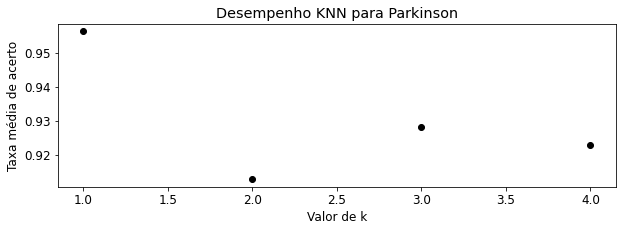

In [34]:
plt.rcParams["figure.figsize"] = [10,3]
plt.rcParams.update({'font.size': 12})

taxa=[[],[],[],[]]
k = 5

for i in range(10):
    np.random.shuffle(data)
    [data_treino,data_teste,label_treino,label_teste]=limparNN(data)
    All = KNN(k, data_treino,label_treino, data_teste,label_teste,taxa)
    

for n in range(k-1):
    #print(n)
    #print('Para n = {:} Taxa média de acerto total: {:.4}'.format(n+1,np.mean(All[n])))
    plt.plot(n+1,np.mean(All[n]),'ko')
plt.title('Desempenho KNN para Parkinson')
plt.xlabel('Valor de k')
plt.ylabel('Taxa média de acerto')


4. A partir dos dois itens acima, o que você conclui? Qual e o melhor k para a tarefa? Houve diferenca quanto à normalizacao?

Text(0, 0.5, 'Taxa média de acerto')

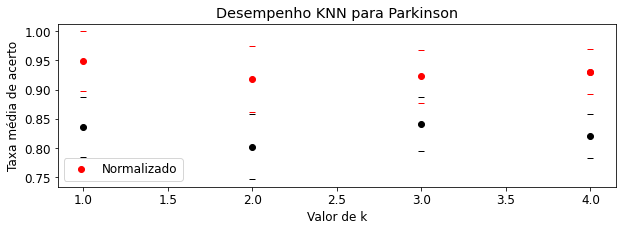

In [35]:
plt.rcParams["figure.figsize"] = [10,3]
plt.rcParams.update({'font.size': 12})

taxa=[[],[],[],[]]
laxa=[[],[],[],[]]
k = 5

for i in range(10):
    np.random.shuffle(data)
    [data_treino,data_teste,label_treino,label_teste]=limpar(data)
    [data_treinoNN,data_testeNN,label_treinoNN,label_testeNN]=limparNN(data)
    
    All = KNN(k, data_treino,label_treino, data_teste,label_teste,taxa)
    Ell = KNN(k, data_treinoNN,label_treinoNN, data_testeNN,label_testeNN,laxa)

for n in range(k-1):
    plt.plot(n+1,np.mean(All[n]),'ko')
    plt.plot(n+1,np.mean(All[n])+np.std(All[n]),'k_')
    plt.plot(n+1,np.mean(All[n])-np.std(All[n]),'k_')
    plt.plot(n+1,np.mean(Ell[n]),'ro')
    plt.plot(n+1,np.mean(Ell[n])+np.std(All[n]),'r_')
    plt.plot(n+1,np.mean(Ell[n])-np.std(All[n]),'r_')

plt.plot(n+1,np.mean(Ell[n]),'ro',label='Normalizado')
plt.legend(loc ="best")
plt.title('Desempenho KNN para Parkinson')
plt.xlabel('Valor de k')
plt.ylabel('Taxa média de acerto')
    


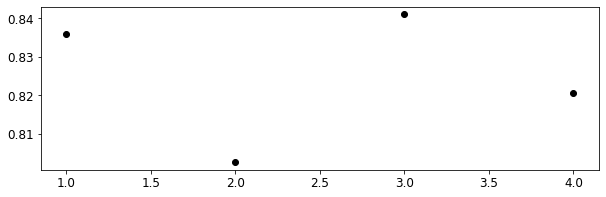

In [36]:
plt.rcParams["figure.figsize"] = [10,3]
plt.rcParams.update({'font.size': 12})

for n in range(k-1):
    plt.plot(n+1,np.mean(All[n]),'ko')

In [23]:
def KNN_MM (k,data_treino,label_treino, data_teste,label_teste,taxa):

    for n in range(1, k):
        nn = KNeighborsClassifier(n_neighbors=n)
        
        print(scaler.fit(data_treino))
        nn.fit(data_treino, label_treino)
        previsoes = nn.predict(data_teste)
        acertos = 0
        for i in range(len(previsoes)):
            if previsoes[i] == label_teste[i]:
                acertos += 1
        taxa[n-1].append(acertos/len(label_teste))
        #print("Para n = %d: \n Taxa de acerto total: %f" %(n, acertos/len(label_teste)))
        #print("Para n = %d: Taxa de acerto total: %f" %(n, acertos/len(label_teste)))
        #return(n,acertos/len(label_teste))
    return (taxa)